In [85]:
import pandas as pd
import numpy as np
from collections import defaultdict

In [86]:
#load reference energy
ref0 = -900.0
ref_dict = {}
lines = open("funclib_median.txt", 'r').readlines()
for l in lines:
    es = l.strip().split()
    ref_dict[es[0]] = float(es[1])-ref0
print(ref_dict)

{'UA': 3.283999999999992, 'UB': -4.994000000000028, 'UC': 8.788999999999987, 'UD': 0.7150000000000318, 'UE': -10.514999999999986, 'UF': 3.05600000000004, 'UG': 3.3980000000000246, 'UH': 3.466000000000008, 'UX-ax': 0.32600000000002183, 'UX-ep': -1.6299999999999955}


In [87]:
#load positive data id
pos_ids = defaultdict(list)
lines = open("positive_data.txt", 'r').readlines()
for l in lines:
    es = l.strip().split()
    pos_ids[es[0]].append(es[1])
print(pos_ids)
print(np.sum([len(l) for l in pos_ids.values()]))

defaultdict(<class 'list'>, {'A': ['A10', 'B1', 'B2', 'F11', 'F12', 'G1', 'G2', 'G3', 'G4', 'H1', 'H2', 'H3', 'I10', 'J1', 'J2', 'J3', 'K1', 'K3', 'L10', 'M3', 'N2', 'N5', 'P1', 'P2', 'P3', 'Q5', 'Q10'], 'B': ['C7', 'C12', 'H1', 'H2', 'H3', 'I10', 'N2'], 'C': ['H1', 'H2', 'H3'], 'D': ['C4', 'H3'], 'E': ['C4', 'C7', 'M10', 'Q1', 'Q2', 'Q3'], 'F': ['C4', 'D10', 'H1', 'H3', 'M3'], 'G': ['B1', 'C5', 'C7', 'C9', 'I1', 'I3', 'J1', 'M10'], 'H': ['B1', 'E10', 'H4', 'J1', 'L7']})
63


In [88]:
#load energy data
all_data = pd.DataFrame()
for i in ["A","B","C","D","E","F","G","H"]:
    df = pd.read_csv("lig/U"+i+"_sc_ave.txt", sep=",", header=None)
    #delete all zero col
    df = df.loc[:,~(df==0).all(axis=0)]
    #add UAA specific ref energy
    df['ref'] = ref_dict["U"+i]
    df['UAA'] = i
    df['label'] = [t in pos_ids[i] for t in df[0]]
    all_data = pd.concat([all_data, df], axis=0, ignore_index=True)
all_data = all_data.rename(columns={0: "id"})

In [89]:
#remove duplicates
#C3 D3
#A10 G4
#E2 E3
#C5 C9
#P2 Q5 Q10
#D4 D5
#A2 A6
all_data = all_data[all_data['id']!="D3" ]
all_data = all_data[all_data['id']!="G4" ]
all_data = all_data[all_data['id']!="E3" ]
all_data = all_data[all_data['id']!="C9" ]
all_data = all_data[all_data['id']!="Q5" ]
all_data = all_data[all_data['id']!="Q10" ]
all_data = all_data[all_data['id']!="D5" ]
all_data = all_data[all_data['id']!="A6" ]

In [90]:
all_data

,id,1,2,3,4,5,6,7,10,11,20,21,ref,UAA,label
0,P1,-36.1975,1.8787,23.8488,0.1270,5.4735,-4.0264,-6.7616,-1.8880,-1.4838,1.1422,-17.8871,3.284,A,True
1,G6,-33.9130,1.2707,24.9448,0.0614,5.1441,-3.8557,-6.5347,-1.8588,-1.2942,1.3875,-14.6481,3.284,A,False
2,G12,-36.4498,2.1963,24.8255,0.1041,5.1911,-3.9468,-6.6842,-1.8688,-1.2765,1.3040,-16.6053,3.284,A,False
3,G5,-34.0369,1.3260,24.2538,0.0509,5.4130,-3.8223,-6.7485,-1.8817,-1.2577,1.1854,-15.5180,3.284,A,False
4,G7,-34.6662,1.1010,24.8848,0.0477,5.2756,-3.9385,-6.9646,-1.8717,-1.3628,0.9179,-16.5767,3.284,A,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,H8,-39.0576,2.6282,27.3665,0.9519,5.8874,-3.8627,-6.9436,-1.9265,-1.0368,1.4248,-14.5685,3.466,H,False
996,H7,-39.0291,2.2299,27.0140,0.6832,6.0539,-3.8505,-6.8141,-1.9192,-1.0385,1.4497,-15.2209,3.466,H,False
997,A9,-41.2898,1.8551,29.6229,0.2946,5.8677,-4.4283,-6.9108,-1.9435,-0.8895,1.0247,-16.7969,3.466,H,False
998,H11,-43.7467,3.5896,29.7432,0.3320,5.5006,-4.3845,-7.1823,-1.9304,-1.6339,1.2753,-18.4371,3.466,H,False


In [91]:
#load ESM-1v, ESM-1b
df1v = pd.read_csv("../evotuning/mm_diskAB_1v_labeled.csv")
df1b = pd.read_csv("../evotuning/mm_diskAB_1b_labeled.csv")

In [92]:
all_data = pd.merge(all_data, df1v.loc[:, ['id','esm1v_t33_650M_UR90S_1']], how='left', on='id')
all_data = pd.merge(all_data, df1v.loc[:, ['id','esm1v_t33_650M_UR90S_2']], how='left', on='id')
all_data = pd.merge(all_data, df1v.loc[:, ['id','esm1v_t33_650M_UR90S_3']], how='left', on='id')
all_data = pd.merge(all_data, df1v.loc[:, ['id','esm1v_t33_650M_UR90S_4']], how='left', on='id')
all_data = pd.merge(all_data, df1v.loc[:, ['id','esm1v_t33_650M_UR90S_5']], how='left', on='id')
all_data = pd.merge(all_data, df1b.loc[:, ['id','esm_msa1b_t12_100M_UR50S']], how='left', on='id')

In [93]:
raw_data = all_data.copy()

In [94]:
#extract X
col = raw_data.columns.values.tolist()
#col.remove('tag')
col.remove('UAA')
col.remove('label')
col.remove('id')

In [95]:
import numpy as np
X = np.array(raw_data[col])
y = np.array(raw_data['label'])

In [96]:
print(X.shape, np.sum(y))

(936, 18) 28


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score

In [15]:
h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

In [16]:
from collections import defaultdict

In [17]:
X = StandardScaler().fit_transform(X)
score_train = defaultdict(list)
score_test = defaultdict(list)
for r in range(10):
    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis(),
        
    ]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42+r)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        f1_train = f1_score(y_train, y_pred_train)
        f1_test = f1_score(y_test, y_pred_test)
        score_train[name].append(f1_train)
        score_test[name].append(f1_test)

/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are col

In [18]:
import matplotlib.pyplot as plt

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

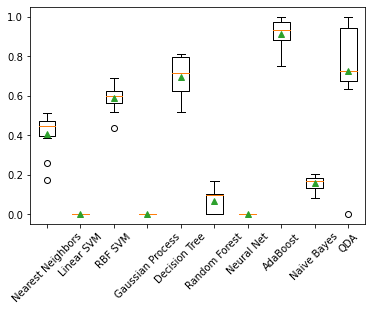

In [19]:
ax = plt.boxplot(score_train.values(), labels=names, showmeans=True)
plt.xticks(rotation=45)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

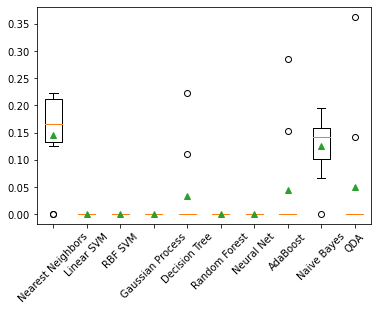

In [20]:
ax = plt.boxplot(score_test.values(), labels=names, showmeans=True)
plt.xticks(rotation=45)

In [21]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [49]:
#load eUnirep 1900/256/64 embedding
from jax_unirep.evotuning_models import mlstm256
from jax_unirep.utils import load_params
from jax_unirep import get_reps

In [97]:
i2s = {}
lines = open("map_label_fname.txt", 'r')
for l in lines:
    es = l.strip().split()
    i2s[es[0]] = es[2]

In [98]:
sequences = [i2s[t] for t in i2s.keys()]
s2t = {i2s[t]:t for t in i2s.keys()}

In [99]:
params = load_params(folderpath='../evotuning/unirep/weights/1900/', paper_weights=1900)[1]
h_avg, h_final, c_final= get_reps(sequences, params=params,mlstm_size=1900)

In [100]:
#t2i.keys() => i2s.keys()
df_evo = pd.DataFrame()
for i, t in enumerate(i2s.keys()):
    d = pd.Series([s2t[sequences[i]]]+[x for x in h_avg[i]])
    assert(t == s2t[sequences[i]])
    df_evo = pd.concat([df_evo, d.to_frame().T], axis=0, ignore_index=True)

In [101]:
convert = {i:"e"+str(i) for i in range(1+1900)}
convert[0] = "id"
df_evo = df_evo.rename(columns=convert)

In [102]:
df_evo

,id,e1,e2,e3,e4,e5,e6,e7,e8,e9,...,e1891,e1892,e1893,e1894,e1895,e1896,e1897,e1898,e1899,e1900
0,A1,0.068748,-0.002848,0.375815,-0.02883,-0.092292,0.154455,-0.039075,-0.067513,-0.200237,...,0.136054,-0.028462,0.196617,-0.429637,-0.083284,0.078747,0.115744,0.172245,0.000161,0.480575
1,A2,0.063004,-0.022993,0.380797,-0.028961,-0.086507,0.145599,-0.044416,-0.067666,-0.193368,...,0.136586,-0.027817,0.194313,-0.429258,-0.078902,0.102782,0.108068,0.176954,0.020906,0.480685
2,A3,0.060636,-0.007073,0.360004,-0.024932,-0.089576,0.141996,-0.039323,-0.070695,-0.183341,...,0.126452,-0.025244,0.194912,-0.426354,-0.073044,0.103076,0.104218,0.169012,0.016125,0.467044
3,A4,0.058969,-0.014151,0.363247,-0.026792,-0.086223,0.13263,-0.040275,-0.06903,-0.181006,...,0.13382,-0.02617,0.194291,-0.433465,-0.076027,0.109897,0.102884,0.171511,0.016812,0.472729
4,A5,0.066387,-0.003409,0.376665,-0.027662,-0.092658,0.15306,-0.038491,-0.066937,-0.200115,...,0.131928,-0.028287,0.195931,-0.429495,-0.080469,0.080317,0.114384,0.172746,0.011527,0.482025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Q7,0.066203,-0.022817,0.379513,-0.026338,-0.087431,0.154042,-0.048898,-0.068588,-0.18944,...,0.137628,-0.027124,0.195278,-0.423898,-0.087935,0.057137,0.114923,0.180091,-0.008896,0.481363
113,Q8,0.06215,-0.007631,0.378109,-0.027438,-0.086483,0.153184,-0.048546,-0.06867,-0.198852,...,0.137341,-0.026981,0.196027,-0.426453,-0.080308,0.068661,0.113565,0.180334,0.005083,0.470217
114,Q9,0.064741,-0.022414,0.381389,-0.026822,-0.085731,0.148276,-0.047921,-0.069277,-0.193976,...,0.134703,-0.028098,0.195141,-0.427415,-0.079767,0.102348,0.105565,0.173978,0.019194,0.478749
115,Q11,0.063314,-0.025709,0.374929,-0.028821,-0.086482,0.147508,-0.047637,-0.068282,-0.185131,...,0.133998,-0.026493,0.196287,-0.431814,-0.083854,0.090013,0.110928,0.177596,0.009661,0.479909


In [103]:
raw_data = pd.merge(all_data, df_evo.loc[:, :], how='left', on='id')

In [104]:
#extract X
col = raw_data.columns.values.tolist()
#col.remove('tag')
col.remove('UAA')
col.remove('label')
col.remove('id')

In [105]:
import numpy as np
X = np.array(raw_data[col])
y = np.array(raw_data['label'])

In [106]:
print(X.shape, np.sum(y))

(936, 1918) 28


In [33]:
X = StandardScaler().fit_transform(X)
score_train = defaultdict(list)
score_test = defaultdict(list)
for r in range(10):
    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42+r)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        f1_train = f1_score(y_train, y_pred_train)
        f1_test = f1_score(y_test, y_pred_test)
        score_train[name].append(f1_train)
        score_test[name].append(f1_test)

/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are col

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

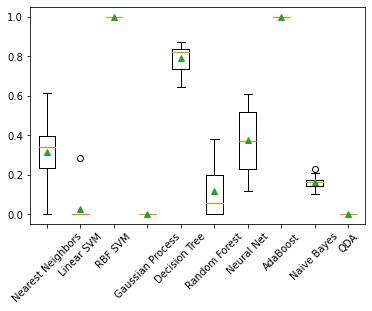

In [34]:
ax = plt.boxplot(score_train.values(), labels=names, showmeans=True)
plt.xticks(rotation=45)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

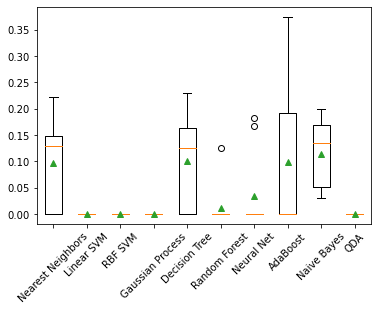

In [35]:
ax = plt.boxplot(score_test.values(), labels=names, showmeans=True)
plt.xticks(rotation=45)

In [36]:
import pickle

In [107]:
with open("LIG_evo1900.pickle", 'wb') as f:
    pickle.dump([X, y], f)

In [109]:
raw_data.columns.values.tolist()

['id',
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 10,
 11,
 20,
 21,
 'ref',
 'UAA',
 'label',
 'esm1v_t33_650M_UR90S_1',
 'esm1v_t33_650M_UR90S_2',
 'esm1v_t33_650M_UR90S_3',
 'esm1v_t33_650M_UR90S_4',
 'esm1v_t33_650M_UR90S_5',
 'esm_msa1b_t12_100M_UR50S',
 'e1',
 'e2',
 'e3',
 'e4',
 'e5',
 'e6',
 'e7',
 'e8',
 'e9',
 'e10',
 'e11',
 'e12',
 'e13',
 'e14',
 'e15',
 'e16',
 'e17',
 'e18',
 'e19',
 'e20',
 'e21',
 'e22',
 'e23',
 'e24',
 'e25',
 'e26',
 'e27',
 'e28',
 'e29',
 'e30',
 'e31',
 'e32',
 'e33',
 'e34',
 'e35',
 'e36',
 'e37',
 'e38',
 'e39',
 'e40',
 'e41',
 'e42',
 'e43',
 'e44',
 'e45',
 'e46',
 'e47',
 'e48',
 'e49',
 'e50',
 'e51',
 'e52',
 'e53',
 'e54',
 'e55',
 'e56',
 'e57',
 'e58',
 'e59',
 'e60',
 'e61',
 'e62',
 'e63',
 'e64',
 'e65',
 'e66',
 'e67',
 'e68',
 'e69',
 'e70',
 'e71',
 'e72',
 'e73',
 'e74',
 'e75',
 'e76',
 'e77',
 'e78',
 'e79',
 'e80',
 'e81',
 'e82',
 'e83',
 'e84',
 'e85',
 'e86',
 'e87',
 'e88',
 'e89',
 'e90',
 'e91',
 'e92',
 'e93',
 'e94',
 'e95',
 'e9